In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [2]:
cars=pd.read_csv("C:/Users/adity/Desktop/sample_project_1/quikr_car.csv")
cars.head(10)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
5,Ford EcoSport Titanium 1.5L TDCi,Ford,2015,Ask For Price,"59,000 kms",Diesel
6,Ford Figo,Ford,2012,"1,75,000","41,000 kms",Diesel
7,Hyundai Eon,Hyundai,2013,"1,90,000","25,000 kms",Petrol
8,Ford EcoSport Ambiente 1.5L TDCi,Ford,2016,"8,30,000","24,530 kms",Diesel
9,Maruti Suzuki Alto K10 VXi AMT,Maruti,2015,"2,50,000","60,000 kms",Petrol


In [3]:
cars.shape

(892, 6)

In [4]:
cars.info

<bound method DataFrame.info of                                        name    company  year          Price  \
0      Hyundai Santro Xing XO eRLX Euro III    Hyundai  2007         80,000   
1                   Mahindra Jeep CL550 MDI   Mahindra  2006       4,25,000   
2                Maruti Suzuki Alto 800 Vxi     Maruti  2018  Ask For Price   
3    Hyundai Grand i10 Magna 1.2 Kappa VTVT    Hyundai  2014       3,25,000   
4          Ford EcoSport Titanium 1.5L TDCi       Ford  2014       5,75,000   
..                                      ...        ...   ...            ...   
887                                      Ta       Tara  zest       3,10,000   
888                     Tata Zest XM Diesel       Tata  2018       2,60,000   
889                      Mahindra Quanto C8   Mahindra  2013       3,90,000   
890                Honda Amaze 1.2 E i VTEC      Honda  2014       1,80,000   
891               Chevrolet Sail 1.2 LT ABS  Chevrolet  2014       1,60,000   

     kms_driven fue

DATA PREPARATION AND CLEANING

In [5]:
#selecting only numeric values
cars=cars[cars['year'].str.isnumeric()]

In [6]:
cars['year']=cars['year'].astype(int)

C:\Users\adity\AppData\Local\Temp\ipykernel_24752\1876331691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars['year']=cars['year'].astype(int)


In [7]:
#price column has some values like "ASK FOR PRICE" which is not required
cars=cars[cars['Price']!="Ask For Price"]
cars.head(10)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
6,Ford Figo,Ford,2012,"1,75,000","41,000 kms",Diesel
7,Hyundai Eon,Hyundai,2013,"1,90,000","25,000 kms",Petrol
8,Ford EcoSport Ambiente 1.5L TDCi,Ford,2016,"8,30,000","24,530 kms",Diesel
9,Maruti Suzuki Alto K10 VXi AMT,Maruti,2015,"2,50,000","60,000 kms",Petrol
10,Skoda Fabia Classic 1.2 MPI,Skoda,2010,"1,82,000","60,000 kms",Petrol
11,Maruti Suzuki Stingray VXi,Maruti,2015,"3,15,000","30,000 kms",Petrol


In [8]:
cars['Price']=cars['Price'].str.replace(',','').astype(int)

C:\Users\adity\AppData\Local\Temp\ipykernel_24752\2558574196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars['Price']=cars['Price'].str.replace(',','').astype(int)


In [9]:
#removing kms and comma in kms_driven column
cars['kms_driven']=cars['kms_driven'].str.split().str.get(0).str.replace(',','')

In [10]:
cars=cars[cars['kms_driven'].str.isnumeric()]

In [11]:
cars['kms_driven']=cars['kms_driven'].astype(int)

In [12]:
#fuel_type has nan values
cars=cars[~cars['fuel_type'].isna()]

In [13]:
cars.shape

(816, 6)

In [14]:
#Changing car names, keeping only first 3 words.
cars['name']=cars['name'].str.split().str.slice(start=0, stop=3).str.join(' ')

In [15]:
cars=cars.reset_index(drop=True)

In [16]:
cars.head(10)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
5,Hyundai Eon,Hyundai,2013,190000,25000,Petrol
6,Ford EcoSport Ambiente,Ford,2016,830000,24530,Diesel
7,Maruti Suzuki Alto,Maruti,2015,250000,60000,Petrol
8,Skoda Fabia Classic,Skoda,2010,182000,60000,Petrol
9,Maruti Suzuki Stingray,Maruti,2015,315000,30000,Petrol


In [17]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [18]:
cars.to_csv('Cleaned_Car_data.csv')

In [19]:
cars.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


In [20]:
cars=cars[cars['Price']<6000000]

In [21]:
#Checking relationship of Company with Price
cars['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [22]:
cars[['company','Price']].head(20)

,company,Price
0,Hyundai,80000
1,Mahindra,425000
2,Hyundai,325000
3,Ford,575000
4,Ford,175000
5,Hyundai,190000
6,Ford,830000
7,Maruti,250000
8,Skoda,182000
9,Maruti,315000


DATA VISUALISATION

In [23]:
import seaborn as sns

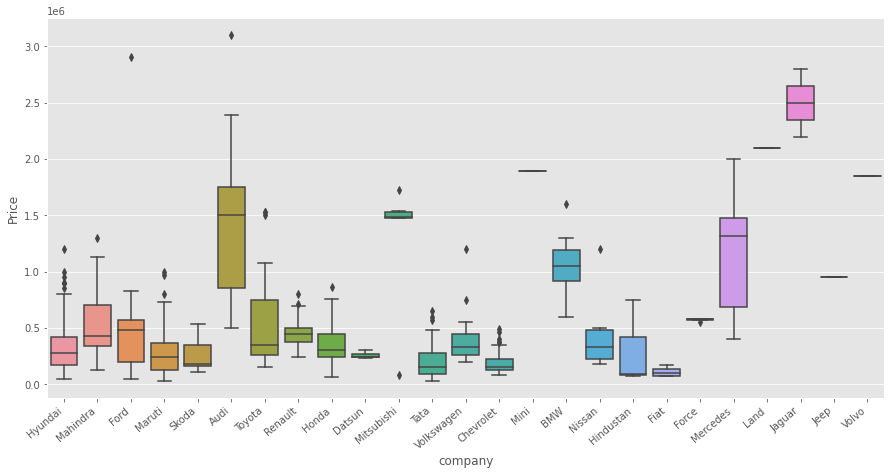

In [24]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=cars)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\seaborn\categorical.py:1296: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\seaborn\categorical.py:1296: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\seaborn\categorical.py:1296: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\seaborn\categorical.py:1296: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


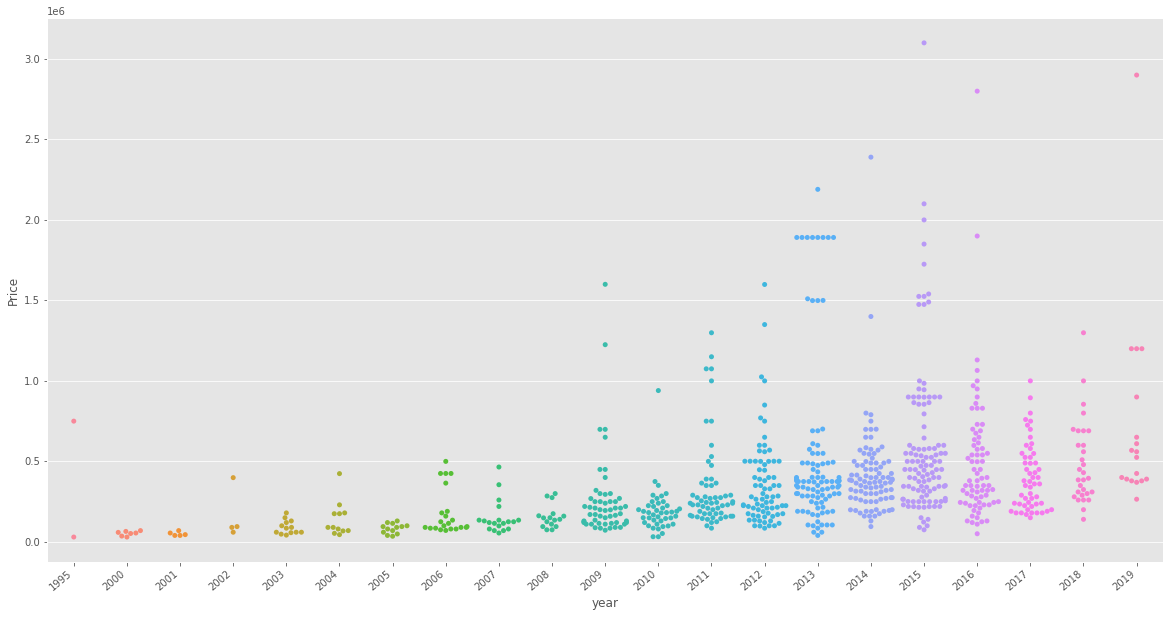

In [25]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=cars)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

Checking relationship of kms_driven with Price 

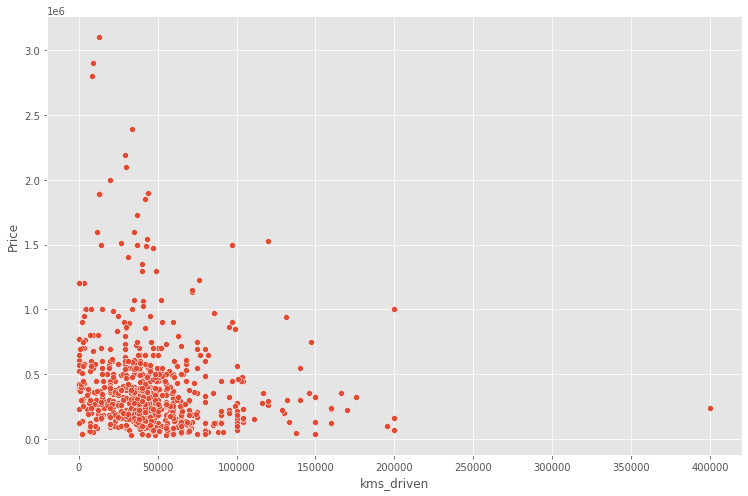

In [26]:
sns.relplot(x='kms_driven',y='Price',data=cars,height=7,aspect=1.5)

Checking relationship of Fuel Type with Price

<AxesSubplot:xlabel='fuel_type', ylabel='Price'>

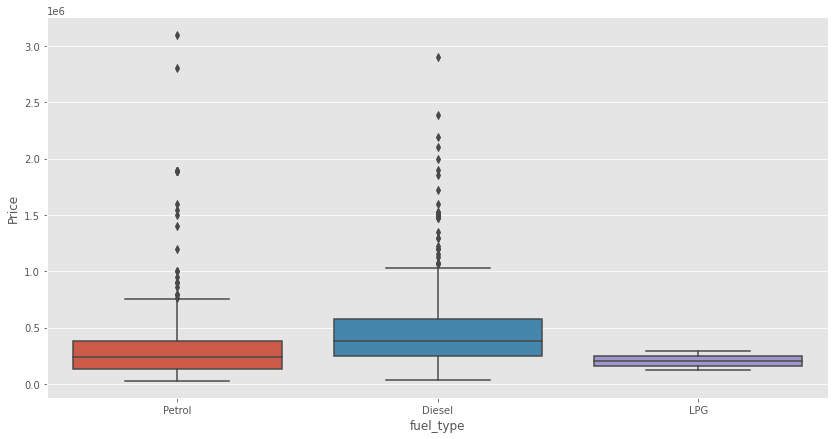

In [27]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=cars)

Relationship of Price with Fuel_Type and Company mixed

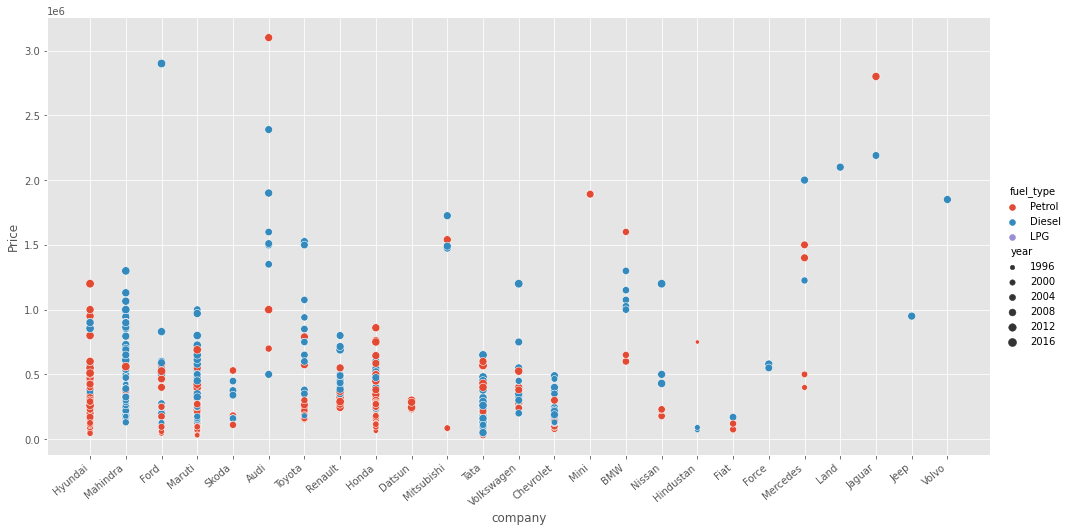

In [28]:
ax=sns.relplot(x='company',y='Price',data=cars,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

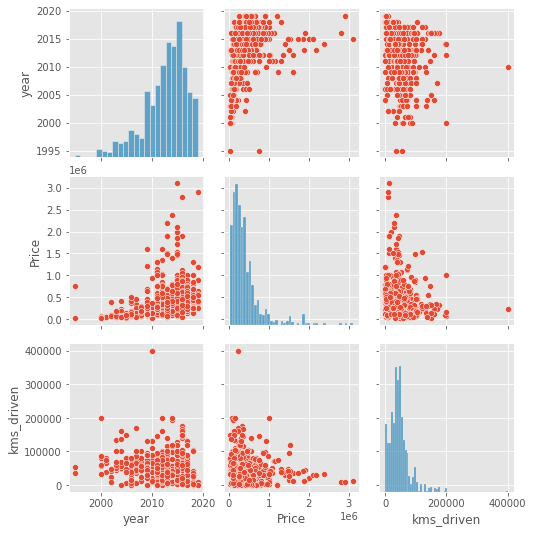

In [29]:
sns.pairplot(cars);

EXTRACTING TRAINING DATA

In [30]:
X=cars[['name','company','year','kms_driven','fuel_type']]
y=cars['Price']

In [31]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
812,Tata Indica V2,Tata,2009,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,132000,Petrol
814,Tata Zest XM,Tata,2018,27000,Diesel


In [32]:
y.shape

(815,)

REGRESSION MODELLING AND FITTING

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#IMPORTS
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [34]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

Creating a column transform to transform categorical columns

In [35]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

Linear Regression Model

In [36]:
lr=LinearRegression()

Making a pipeline

In [37]:
pipe=make_pipeline(column_trans,lr)

FITTING THE MODEL

In [38]:
pipe.fit(X_train,y_train) 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Pe

In [39]:
#Predicting new Values
y_pred=pipe.predict(X_test)
# y_pred

In [40]:
y_pred

array([ 425572.26617713,  301686.30893454,  376607.78955401,
        456825.24537871,  115200.89536304,  294619.25634158,
         44536.7466131 ,  856351.50990091, 2166494.17941289,
        610850.36715665,  325814.39602572,  393045.37103461,
        403192.92832547,  225842.90434815,  516465.11936364,
        430637.44297063,  219251.38351716,  564506.45690477,
        334439.73468662,  301216.81749518,  239207.00255223,
        478171.43975426,  525284.30301314,  810783.14632397,
        276641.84614833,  524514.2873691 ,  814181.79559746,
        225858.97263412,  437361.84620263,  163389.60635711,
       1390594.17403618,  205338.74143682,  348388.97084457,
         34704.59070159,  327315.61687291,  519172.88725119,
        272879.62615147,  734033.58162365,  438649.65572245,
         60468.33908467,  461560.14035136,  434013.18083919,
        300004.66490254,  395265.35923358,  325759.28927366,
        641926.99801169,  489643.55036595,  356572.33238874,
        528363.67061415,

Checking R2 Score

In [41]:
r2_score(y_test,y_pred)

0.6968502942149504

In [42]:
# for i in range(10):
#     X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)
#     lr=LinearRegression()
#     pipe=make_pipeline(column_trans,lr)
#     pipe.fit(X_train,y_train)
#     y_pred=pipe.predict(X_test)
#     print(r2_score(y_test,y_pred),i)

Finding the model with a random state of TrainTestSplit loop which increases the r2 score > 0.90

In [42]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [43]:
np.argmax(scores)

302

In [45]:
# np.amax(scores)
# scores[np.argmax(scores)]

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8991157554877304

Ridge Regression Model

In [46]:
rid=Ridge()
pipe_r=make_pipeline(column_trans,rid)
pipe_r.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
       'Volkswagen Vento Konekt', 'Volvo S80 Summum'], dtype=object),
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                 

In [47]:
#Predicting new Values
rid_pred=pipe_r.predict(X_test)
# rid_pred
rid_pred

array([427772.91321261, 427772.91416132, 467035.51712083, 410634.47366758,
       402532.66588491, 449585.46910829, 458933.707877  , 411385.44755297,
       449585.46910829, 419982.71335149, 360777.19843831, 468281.94931741,
       384926.81575141, 401278.44379733, 415308.59401422, 376357.59678164,
       419982.71334145, 384147.78960988, 377915.63790363, 398170.15623671,
       367909.90637631, 387263.87799851, 396612.11688616, 416866.63286432,
       421540.7544547 , 410634.47374465, 423098.79337822, 376357.59722158,
       417801.45146319, 384147.79708387, 457375.67036687, 464386.84936739,
       434005.07150875, 423098.7933827 , 469839.98910515, 267294.81441815,
       448027.42882097, 382589.75692383, 351428.96007596, 438679.18873492,
       415308.59270451, 454571.19904765, 399728.19648638, 469839.98919781,
       379593.64727582, 356103.08208946, 363893.28023078, 407518.39363178,
       449585.46910829, 430888.99368757, 314036.0065644 , 461114.96532636,
       360777.19525474, 4

In [48]:
r2_score(y_test,rid_pred)

0.01693315562990083

In [57]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    rid=Ridge()
    pipe_r=make_pipeline(column_trans,rid)
    pipe_r.fit(X_train,y_train)
    rid_pred=pipe_r.predict(X_test)
    scores.append(r2_score(y_test,rid_pred))

In [58]:
np.argmax(scores)

706

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
rid=Ridge()
pipe_r=make_pipeline(column_trans,rid)
pipe_r.fit(X_train,y_train)
rid_pred=pipe.predict(X_test)
r2_score(y_test,rid_pred)

0.8238468353778857

Lasso Regression Method

In [60]:
lass=Lasso()
pipe_l=make_pipeline(column_trans,lass)
pipe_l.fit(X_train,y_train)

C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 805418627559.021, tolerance: 10787410140.46012
  model = cd_fast.sparse_enet_coordinate_descent(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
       'Volkswagen Vento Konekt', 'Volvo S80 Summum'], dtype=object),
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                 

In [61]:
#Predicting new Values
lass_pred=pipe_l.predict(X_test)
# lass_pred
lass_pred

array([ 235177.10717653,  520205.28140055,  302752.92803811,
       1258003.77524349,  139111.43064994,  250882.09130377,
        533924.99630903,  500639.91331773,   60691.64719737,
        289656.62365392,  324377.39405956,  182732.17895095,
        209752.43609925,  655427.40479046,  586111.45695969,
        417534.80587974,  278843.77788562,  295265.24388064,
        267939.73373659,  233088.42665256,  214004.42689075,
        147391.12764347,  280594.36857809,  187912.86780632,
         89027.13045222,  458712.83712165,  266037.18231667,
        660397.76414662,  358388.16944396,  105346.42656127,
        573168.13103341,  210045.43296581,  430486.20578585,
        150706.0067254 ,   14605.23860355,   65776.95733723,
        730758.13108481,   92357.49175235,  513252.75567914,
        783763.496329  ,  475682.6705432 ,  168183.18085513,
        218840.16649401,  408318.61861225,  444770.08780506,
        220232.14786535,   30128.88797624,  279091.73873939,
        358930.77060041,

In [62]:
r2_score(y_test,lass_pred)

0.7799542720253076

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
lass=Lasso()
pipe_l=make_pipeline(column_trans,lass)
pipe_l.fit(X_train,y_train)
lass_pred=pipe_l.predict(X_test)
r2_score(y_test,lass_pred)

C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 805418627559.021, tolerance: 10787410140.46012
  model = cd_fast.sparse_enet_coordinate_descent(


0.7799542720253076

In [64]:
#BEFORE FINDING BEST RANDOM STATE
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([456670.3272301])

In [65]:
#BEFORE FINDING BEST RANDOM STATE
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Audi Q3 2.0','Audi',2009,17600,'Petrol']).reshape(1,5)))

array([1583847.87335398])

In [66]:
import pickle

In [67]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [68]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([456670.3272301])

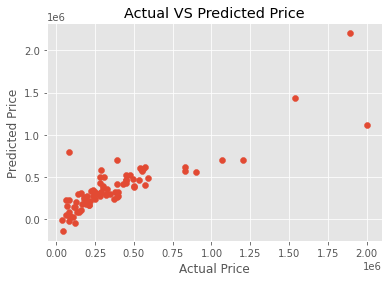

In [95]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual VS Predicted Price")
plt.show()

As we can see that the values are very close, it confirms that Predicted price are very similar to Actual Price.

In [96]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
       'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
       'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
       'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
       'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
       'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
       'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
       'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
       'Ford EcoSport Titanium', 'Ford EcoSport Trend',
       'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
       'Ford Figo Diese